### Medidas de Dispersão

A **Variância** (ou segundo momento) é um valor numérico utilizado para descrever quanto variam os números de uma distribuição com relação à média deles. E pode ser definida da seguinte maneira:
    
$$ \sigma{_x}^{2} = \frac{1}{N}\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 }  $$

É a média da diferença elevada ao quadrado entre cada valor e a média.
Em outras palavras ela mede o quanto os dados estão distantes de x_barra (média), quanto maior esse número, mais distante da média os valores estão, em média (dividido por n).

O **Desvio Padrão** é a raiz quadrada da variância, para "retornar" a variável para sua escala original.

$$ \sigma = \sqrt {\frac{1}{N}\sum\limits_{i = 1}^N {\left( {x_i - \bar x} \right)^2 }}  $$

Uma vantagem do desvio padrão é que ele é expresso nas mesmas unidades que a distribuição. 
(Por outro lado, a variância tem outras unidades, já que está elevada ao quadrado.)

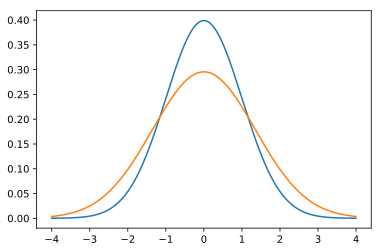

In [8]:
import scipy
import scipy.stats as ss
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_formats=['svg']

x_axis = np.arange(-4, 4, 0.001)
mean, std, std2 = 0, 1, 1.35

plt.plot(x_axis, norm.pdf(x_axis,mean,std), label='normal 0,1')
plt.plot(x_axis, norm.pdf(x_axis,mean,std2), label='normal 0,3')

plt.show()

fazer com exemplos reais

### Medidas de Associação

**Correlação** e **Covariância**

Wikipedia:

Em probabilidade e estatística, correlação, dependência ou associação é qualquer relação estatística (causal ou não causal) entre duas variáveis e correlação é qualquer relação dentro de uma ampla classe de relações estatísticas que envolva dependência entre duas variáveis.Por exemplo, a correlação entre a estatura dos pais e a estatura dos pais e dos filhos. Embora seja comumente denotada como a medida de relação entre duas variáveis aleatórias, correlação não implica causalidade. Em alguns casos, correlação não identifica dependência entre as variáveis. Em geral, há pares de variáveis que apresentam forte dependência estatística, mas que possuem correlação nula. Para este casos, são utilizadas outras medidas de dependência.


**Covariância pode ser definida da seguinte forma:**

$$ cov_{x,y} = \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})\quad \text{(covariance)} $$

$$\sigma{_x}^{2} = \sum_{i=1}^{n} (x_i - \bar{x})^2\quad \text{(variance)}	$$

** Correlação **

A correlação é uma versão padronizada (dividida pelos desvios padrão) da covariância e sempre está entre 1 e -1, portanto pode ser comparada com variaveis que não tem necessáriamente a mesma escala.


$$ \rho = \frac{{}\sum_{i=1}^{n} (x_i - \overline{x})(y_i - \overline{y})}
{\sqrt{\sum_{i=1}^{n} (x_i - \overline{x})^2(y_i - \overline{y})^2}}$$

In [9]:
import numpy
X = np.random.normal(10, 1, 100)
Y = -X + numpy.random.normal(0, 4, 100)

print(len(X), len(Y))
print(X[:10])
print(Y[:10])

100 100
[10.55374249  8.29790426  9.69520582  9.30412856 10.0188368  10.76275235
  8.35069333  9.63132558 10.87050061  9.51223173]
[ -8.57072606 -10.57115866  -9.90906428 -10.29654157 -16.81454513
  -7.31634713  -6.28246351 -12.7298158  -14.63215864 -10.75692555]


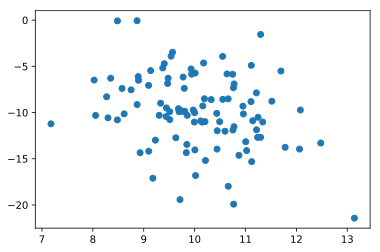

In [10]:
plt.scatter(X, Y)

In [11]:
# calculando correlação.
metodo_nutella = scipy.stats.pearsonr(X, Y)
print(metodo_nutella)

(-0.28401696991395853, 0.004187473404737506)


In [12]:
xy = list(zip(list(X),list(Y)))
print(xy[:5])

[(10.55374248938698, -8.570726060565887), (8.297904255357617, -10.571158661789699), (9.695205824957856, -9.90906428122503), (9.304128562343449, -10.296541574770174), (10.018836797385346, -16.81454512667393)]


In [13]:
def corr_metodo_raiz(data):
    n = len(data)
    sumx = sum(i[0] for i in data)
    sumy = sum(i[1] for i in data)
    
    sumxSq=sum([i[0]**2.0 for i in data])
    sumySq=sum([i[1]**2.0 for i in data])
    
    pSum=sum([i[0]*i[1] for i in data])
    
    numerador=pSum-(sumx*sumy/n)
    denominador=((sumxSq-pow(sumx,2)/n)*(sumySq-pow(sumy,2)/n))**.5
    
    if denominador==0:
        r=0
    else:
        r=numerador/denominador
        
    return r

In [14]:
corr_metodo_raiz(xy)

-0.28401696991396297